In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

    

In [22]:
df_resumo = pd.read_excel(
    'Dados maceração.xlsx',
    sheet_name='Resumo'
)

df_resumo.head()

,Mês/Ano,SO2 - Água Leve,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Maceração A - Temperatura,Maceração A - Temperatura.1,...,Maceração B - Temperatura.4,Maceração B - Temperatura.5,Maceração B - Temperatura.6,Maceração B - Temperatura.7,Maceração B - Temperatura.8,Folha Moagem A,Folha Moagem A.1,Folha Moagem A.2,Folha Moagem B,Folha Moagem B.1
0,NaT,NaN,NaN,NaN,NaN,NaN,Fechamento moagem A,Fechamento moagem B,Tanque 1,Tanque 2,...,Tanque 5,Tanque 6,Tanque 7,Tanque 8,Tanque 9,Concentrador Middlings,ADA-40,Concentrador Glúten,Concentrador Middlings,Concentrador Glúten
1,NaT,SO2 - Água Leve,SO2 - Água de Processo,SO2 Água Ácida,Spin da água leve,Spin da Água de Processo (mL),Tempo de maceração,Tempo de maceração,Temperatura,Temperatura,...,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Spin Over (mL),Spin Over (mL),Spin Over (mL),Spin Over (mL),Spin Over (mL)
2,2024-09-01,250.513333,877.25,2108.056338,0.260377,0.180282,50.83375,59.65,50.741935,50.459016,...,47.954545,47.5,47.736842,47.47619,47.634146,0.145455,0.109396,0.149682,0.115455,0.111607
3,2024-10-01,213.014286,738.821429,2061.689922,0.167769,0.13252,70.815932,82.52029,50.528814,50.539683,...,49.162791,48.534091,48.712644,48.2,48.6875,0.138062,0.137413,0.141869,0.129381,0.110256
4,2024-11-01,191.732919,783,2041.637363,0.178448,0.150641,68.675,70.21875,50.631667,50.915447,...,50.365217,50.696429,50.649565,50.446429,50.495614,0.116667,0.137234,0.134276,0.113879,0.104965


In [23]:
df_resumo.columns


Index(['Mês/Ano', 'SO2 - Água Leve', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Maceração A - Temperatura',
       'Maceração A - Temperatura.1', 'Maceração A - Temperatura.2',
       'Maceração A - Temperatura.3', 'Maceração A - Temperatura.4',
       'Maceração A - Temperatura.5', 'Maceração A - Temperatura.6',
       'Maceração A - Temperatura.7', 'Maceração A - Temperatura.8',
       'Maceração A - Temperatura.9', 'Maceração A - Temperatura.10',
       'Maceração A - Temperatura.11', 'Maceração B - Temperatura',
       'Maceração B - Temperatura.1', 'Maceração B - Temperatura.2',
       'Maceração B - Temperatura.3', 'Maceração B - Temperatura.4',
       'Maceração B - Temperatura.5', 'Maceração B - Temperatura.6',
       'Maceração B - Temperatura.7', 'Maceração B - Temperatura.8',
       'Folha Moagem A', 'Folha Moagem A.1', 'Folha Moagem A.2',
       'Folha Moagem B', 'Folha Moagem B.1'],
      dtype='object')

In [24]:
# Identificar a coluna de data/mês
col_mes = df_resumo.columns[0]
print(f"Coluna de período: '{col_mes}'")


Coluna de período: 'Mês/Ano'


In [25]:
col_mes = df_resumo.columns[0]

cols_temp_B = [
    col for col in df_resumo.columns
    if col.startswith('Maceração B - Temperatura')
]

cols_temp_B



['Maceração B - Temperatura',
 'Maceração B - Temperatura.1',
 'Maceração B - Temperatura.2',
 'Maceração B - Temperatura.3',
 'Maceração B - Temperatura.4',
 'Maceração B - Temperatura.5',
 'Maceração B - Temperatura.6',
 'Maceração B - Temperatura.7',
 'Maceração B - Temperatura.8']

In [26]:
df_temp_B = df_resumo[[col_mes] + cols_temp_B].copy()
df_temp_B


,Mês/Ano,Maceração B - Temperatura,Maceração B - Temperatura.1,Maceração B - Temperatura.2,Maceração B - Temperatura.3,Maceração B - Temperatura.4,Maceração B - Temperatura.5,Maceração B - Temperatura.6,Maceração B - Temperatura.7,Maceração B - Temperatura.8
0,NaT,Tanque 1,Tanque 2,Tanque 3,Tanque 4,Tanque 5,Tanque 6,Tanque 7,Tanque 8,Tanque 9
1,NaT,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura,Temperatura
2,2024-09-01,47.5,47.769231,48.4,48.105263,47.954545,47.5,47.736842,47.47619,47.634146
3,2024-10-01,48.89011,49.10989,49.211111,49.269048,49.162791,48.534091,48.712644,48.2,48.6875
4,2024-11-01,51.07767,50.768519,50.609091,50.570175,50.365217,50.696429,50.649565,50.446429,50.495614
5,2024-12-01,48.666176,48.970175,48.954651,48.83253,48.831765,49.431868,48.805556,48.816667,49.005814
6,2025-01-01,49.2375,49.563415,49.944262,49.248529,50.334426,48.321818,49.859649,49.260784,49.344681
7,2025-02-01,49.689041,49.608537,50.134177,49.790123,48.480952,50.75,50.311765,50.028409,49.012658
8,2025-03-01,50.054639,49.958654,50.194792,50.023232,50.132353,48.983146,50.183784,49.953535,50.19697
9,2025-04-01,48.938947,49.01875,49.365217,48.819802,49.451765,48.554082,49.406593,49.001031,49.378889


In [27]:
df_temp_B[cols_temp_B].dtypes


Maceração B - Temperatura      object
Maceração B - Temperatura.1    object
Maceração B - Temperatura.2    object
Maceração B - Temperatura.3    object
Maceração B - Temperatura.4    object
Maceração B - Temperatura.5    object
Maceração B - Temperatura.6    object
Maceração B - Temperatura.7    object
Maceração B - Temperatura.8    object
dtype: object

In [28]:
# Converter valores de temperatura para numérico
valores_antes = df_temp_B[cols_temp_B].notna().sum().sum() # total de valores antes da conversão
df_temp_B[cols_temp_B] = ( 
    df_temp_B[cols_temp_B]
        .replace(',', '.', regex=True)
        .apply(pd.to_numeric, errors='coerce')
)
valores_depois = df_temp_B[cols_temp_B].notna().sum().sum()
print(f"Valores convertidos: {valores_depois}/{valores_antes}") # total de valores convertidos
if valores_depois < valores_antes: 
    print(f"⚠️ {valores_antes - valores_depois} valores não puderam ser convertidos")

Valores convertidos: 153/171
⚠️ 18 valores não puderam ser convertidos


In [29]:
df_temp_B['Temp_media'] = df_temp_B[cols_temp_B].mean(axis=1) # média
df_temp_B['Temp_std']   = df_temp_B[cols_temp_B].std(axis=1) # desvio padrão
df_temp_B['Temp_delta'] = (
    df_temp_B[cols_temp_B].max(axis=1) - # valor máximo
    df_temp_B[cols_temp_B].min(axis=1) # valor mínimo
)


In [30]:
df_temp_B['Temp_media'].describe() # resumo estatístico 


count    17.000000
mean     48.728919
std       0.869654
min      47.580561
25%      47.979437
50%      48.673540
75%      49.103897
max      50.630968
Name: Temp_media, dtype: float64

In [31]:
df_temp_B[['Temp_std', 'Temp_delta']].describe() # resumo estatístico


,Temp_std,Temp_delta
count,17.000000,17.000000
mean,0.513789,1.609038
std,0.228200,0.723399
min,0.209245,0.712453
25%,0.360341,1.069048
50%,0.450019,1.443379
75%,0.661316,2.071712
max,1.101519,3.352262


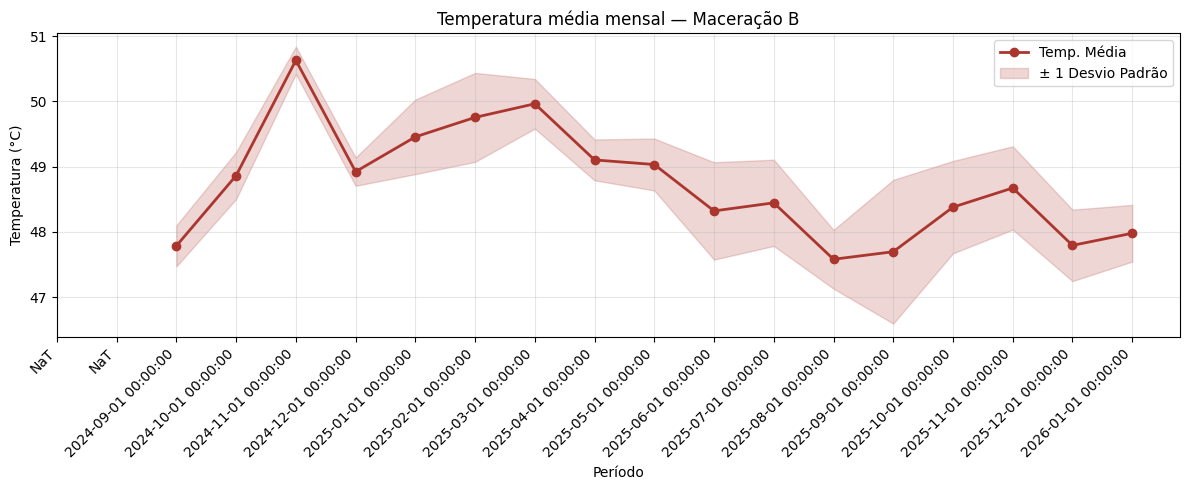

In [32]:
# Gráfico de temperatura média ao longo do tempo com faixa de desvio padrão
fig, ax = plt.subplots(figsize=(12, 5))

# Criar índices numéricos para o eixo X
x_pos = range(len(df_temp_B))

# Plotar linha de temperatura média
ax.plot(x_pos, df_temp_B['Temp_media'], marker='o', color='#AB362E', linewidth=2, label='Temp. Média')

# Adicionar faixa de desvio padrão
ax.fill_between(
    x_pos,
    df_temp_B['Temp_media'] - df_temp_B['Temp_std'],
    df_temp_B['Temp_media'] + df_temp_B['Temp_std'],
    alpha=0.2,
    color='#AB362E',
    label='± 1 Desvio Padrão'
)

# Configurar rótulos do eixo X com os valores reais
ax.set_xticks(x_pos)
ax.set_xticklabels(df_temp_B[col_mes], rotation=45, ha='right')

# Configurações do gráfico
ax.set_xlabel('Período')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura média mensal — Maceração B')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

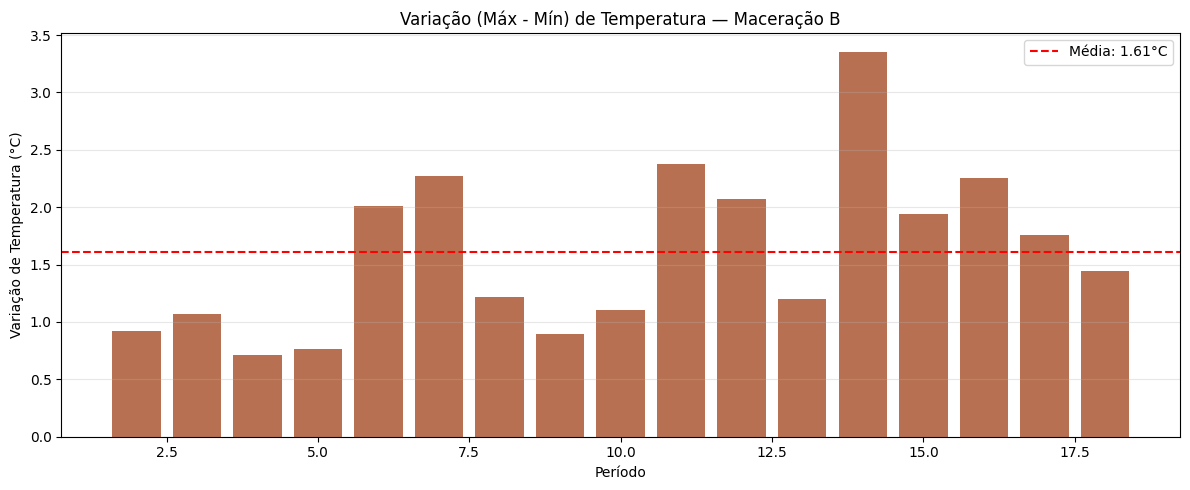

In [33]:
# Gráfico de variação de temperatura (delta) por mês
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(range(len(df_temp_B)), df_temp_B['Temp_delta'], color="#9B3309", alpha=0.7)
ax.set_xlabel('Período')
ax.set_ylabel('Variação de Temperatura (°C)')
ax.set_title('Variação (Máx - Mín) de Temperatura — Maceração B')
ax.axhline(df_temp_B['Temp_delta'].mean(), color='red', linestyle='--', 
           label=f'Média: {df_temp_B["Temp_delta"].mean():.2f}°C')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

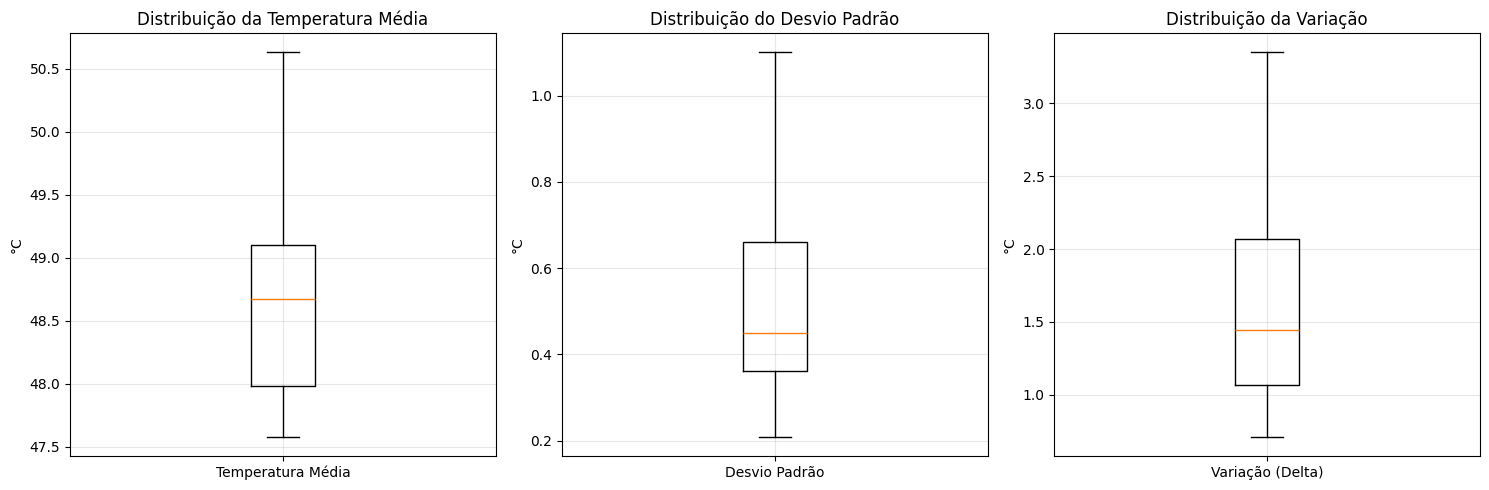

In [34]:
# Boxplot para identificar outliers nas temperaturas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(df_temp_B['Temp_media'].dropna(), tick_labels=['Temperatura Média'])
axes[0].set_ylabel('°C')
axes[0].set_title('Distribuição da Temperatura Média')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df_temp_B['Temp_std'].dropna(), tick_labels=['Desvio Padrão'])
axes[1].set_ylabel('°C')
axes[1].set_title('Distribuição do Desvio Padrão')
axes[1].grid(True, alpha=0.3)

axes[2].boxplot(df_temp_B['Temp_delta'].dropna(), tick_labels=['Variação (Delta)'])
axes[2].set_ylabel('°C')
axes[2].set_title('Distribuição da Variação')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
df_temp_B['Temp_CV_%'] = (
    df_temp_B['Temp_std'] / df_temp_B['Temp_media'] * 100
)

df_temp_B['Temp_CV_%'].describe()


count    17.000000
mean      1.057752
std       0.478139
min       0.413274
25%       0.737435
50%       0.945805
75%       1.365057
max       2.309445
Name: Temp_CV_%, dtype: float64

In [36]:
df_temp_B.sort_values('Temp_delta', ascending=False).head(5) # Top 5 maiores variações


,Mês/Ano,Maceração B - Temperatura,Maceração B - Temperatura.1,Maceração B - Temperatura.2,Maceração B - Temperatura.3,Maceração B - Temperatura.4,Maceração B - Temperatura.5,Maceração B - Temperatura.6,Maceração B - Temperatura.7,Maceração B - Temperatura.8,Temp_media,Temp_std,Temp_delta,Temp_CV_%
14,2025-09-01,46.265385,47.308434,46.408750,47.612000,47.343750,47.526923,49.617647,48.146835,49.036585,47.696257,1.101519,3.352262,2.309445
11,2025-06-01,47.730337,48.449074,47.702198,47.984615,47.277451,48.472642,49.150000,48.478261,49.651351,48.321770,0.746253,2.373900,1.544341
7,2025-02-01,49.689041,49.608537,50.134177,49.790123,48.480952,50.750000,50.311765,50.028409,49.012658,49.756185,0.681894,2.269048,1.370470
16,2025-11-01,48.349038,49.918333,48.633333,48.377876,47.666087,48.289474,48.839655,48.744545,49.243519,48.673540,0.638732,2.252246,1.312277
12,2025-07-01,48.446087,49.129839,48.265766,48.372358,47.784848,47.159322,49.231034,48.724219,48.900775,48.446028,0.661316,2.071712,1.365057


In [37]:
# Análise comparativa por período (primeira e segunda metade)
metade = len(df_temp_B) // 2
df_temp_B['Periodo'] = [
    'Inicial' if i < metade else 'Final'
    for i in range(len(df_temp_B))
]

print(f"Período Inicial: {metade} meses | Período Final: {len(df_temp_B) - metade} meses\n")
df_temp_B.groupby('Periodo')[['Temp_media', 'Temp_std', 'Temp_delta']].mean()

Período Inicial: 9 meses | Período Final: 10 meses



,Temp_media,Temp_std,Temp_delta
Periodo,,,
Final,48.300839,0.599929,1.838717
Inicial,49.340463,0.390731,1.280926


#  RELATÓRIO DE ANÁLISE - Maceração A - Temperatura

---

In [38]:
# Gerar relatório automático
from datetime import datetime

print("=" * 80)
print("RELATÓRIO DE ANÁLISE - TEMPERATURA DA MACERAÇÃO B")
print("=" * 80)
print(f"Data de geração: {datetime.now().strftime('%d/%m/%Y %H:%M')}")
print(f"Período analisado: {len(df_temp_B)} meses")
print("=" * 80)

print("\n 1. ESTATÍSTICAS GERAIS\n")
print(f"   Temperatura Média Geral:      {df_temp_B['Temp_media'].mean():.2f}°C")
print(f"   Temperatura Mínima:           {df_temp_B['Temp_media'].min():.2f}°C")
print(f"   Temperatura Máxima:           {df_temp_B['Temp_media'].max():.2f}°C")
print(f"   Amplitude Total:              {df_temp_B['Temp_media'].max() - df_temp_B['Temp_media'].min():.2f}°C")
print(f"   Desvio Padrão Médio:          {df_temp_B['Temp_std'].mean():.2f}°C")
print(f"   Coeficiente de Variação:      {df_temp_B['Temp_CV_%'].mean():.2f}%")

print("\n 2. ANÁLISE DE VARIABILIDADE\n")
print(f"   Variação Média (Δ Máx-Mín):   {df_temp_B['Temp_delta'].mean():.2f}°C")
print(f"   Menor Variação:               {df_temp_B['Temp_delta'].min():.2f}°C")
print(f"   Maior Variação:               {df_temp_B['Temp_delta'].max():.2f}°C")

# Encontrar mês com maior variação
mes_maior_variacao = df_temp_B.loc[df_temp_B['Temp_delta'].idxmax(), col_mes]
print(f"   Mês com maior variação:       {mes_maior_variacao}")

print("\n 3. COMPARAÇÃO POR PERÍODO\n")
comparacao = df_temp_B.groupby('Periodo')[['Temp_media', 'Temp_std', 'Temp_delta']].mean()
print(f"   PERÍODO INICIAL ({metade} meses):")
print(f"      • Temperatura média:        {comparacao.loc['Inicial', 'Temp_media']:.2f}°C")
print(f"      • Desvio padrão:            {comparacao.loc['Inicial', 'Temp_std']:.2f}°C")
print(f"      • Variação média:           {comparacao.loc['Inicial', 'Temp_delta']:.2f}°C")

print(f"\n   PERÍODO FINAL ({len(df_temp_B) - metade} meses):")
print(f"      • Temperatura média:        {comparacao.loc['Final', 'Temp_media']:.2f}°C")
print(f"      • Desvio padrão:            {comparacao.loc['Final', 'Temp_std']:.2f}°C")
print(f"      • Variação média:           {comparacao.loc['Final', 'Temp_delta']:.2f}°C")

# Calcular diferenças
diff_temp = comparacao.loc['Final', 'Temp_media'] - comparacao.loc['Inicial', 'Temp_media']
diff_std = comparacao.loc['Final', 'Temp_std'] - comparacao.loc['Inicial', 'Temp_std']

print(f"\n   VARIAÇÃO ENTRE PERÍODOS:")
print(f"      • Diferença de temperatura: {diff_temp:+.2f}°C")
print(f"      • Diferença de estabilidade: {diff_std:+.2f}°C")

print("\n⚠️ 4. OBSERVAÇÕES\n")

# Detectar outliers
Q1 = df_temp_B['Temp_media'].quantile(0.25)
Q3 = df_temp_B['Temp_media'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_temp_B[(df_temp_B['Temp_media'] < Q1 - 1.5*IQR) | (df_temp_B['Temp_media'] > Q3 + 1.5*IQR)]

if len(outliers) > 0:
    print(f"   • {len(outliers)} outlier(s) detectado(s) na temperatura média")
    for idx, row in outliers.iterrows():
        print(f"      - {row[col_mes]}: {row['Temp_media']:.2f}°C")
else:
    print("   • Nenhum outlier detectado")

# Avaliar estabilidade
if df_temp_B['Temp_CV_%'].mean() < 2:
    print("   • Processo apresenta ALTA estabilidade (CV < 2%)")
elif df_temp_B['Temp_CV_%'].mean() < 5:
    print("   • Processo apresenta BOA estabilidade (CV < 5%)")
else:
    print("   • Processo apresenta MÉDIA estabilidade (CV ≥ 5%)")

print("\n" + "=" * 80)

RELATÓRIO DE ANÁLISE - TEMPERATURA DA MACERAÇÃO B
Data de geração: 05/02/2026 21:58
Período analisado: 19 meses

 1. ESTATÍSTICAS GERAIS

   Temperatura Média Geral:      48.73°C
   Temperatura Mínima:           47.58°C
   Temperatura Máxima:           50.63°C
   Amplitude Total:              3.05°C
   Desvio Padrão Médio:          0.51°C
   Coeficiente de Variação:      1.06%

 2. ANÁLISE DE VARIABILIDADE

   Variação Média (Δ Máx-Mín):   1.61°C
   Menor Variação:               0.71°C
   Maior Variação:               3.35°C
   Mês com maior variação:       2025-09-01 00:00:00

 3. COMPARAÇÃO POR PERÍODO

   PERÍODO INICIAL (9 meses):
      • Temperatura média:        49.34°C
      • Desvio padrão:            0.39°C
      • Variação média:           1.28°C

   PERÍODO FINAL (10 meses):
      • Temperatura média:        48.30°C
      • Desvio padrão:            0.60°C
      • Variação média:           1.84°C

   VARIAÇÃO ENTRE PERÍODOS:
      • Diferença de temperatura: -1.04°C
      • 

## 💡 Conclusões e Recomendações

### Principais Achados:
1. **Tendência de queda**: A temperatura média caiu do período inicial para o final
2. **Aumento da variabilidade**: Maior instabilidade no período final
3. **Controle de processo**: Necessário investigar causas da maior variação

### Recomendações:
- ✅ Revisar parâmetros de controle no período final
- ✅ Investigar causas da maior variação de temperatura
- ✅ Avaliar impacto na qualidade do produto
- ✅ Implementar monitoramento contínuo dos pontos críticos

In [39]:
# Exportar relatório para arquivo de texto
nome_arquivo = f'relatorio_maceracao_B_{datetime.now().strftime("%Y%m%d_%H%M")}.txt'

with open(nome_arquivo, 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("RELATÓRIO DE ANÁLISE - TEMPERATURA DA MACERAÇÃO B\n")
    f.write("=" * 80 + "\n")
    f.write(f"Data de geração: {datetime.now().strftime('%d/%m/%Y %H:%M')}\n")
    f.write(f"Período analisado: {len(df_temp_B)} meses\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(" 1. ESTATÍSTICAS GERAIS\n\n")
    f.write(f"   Temperatura Média Geral:      {df_temp_B['Temp_media'].mean():.2f}°C\n")
    f.write(f"   Temperatura Mínima:           {df_temp_B['Temp_media'].min():.2f}°C\n")
    f.write(f"   Temperatura Máxima:           {df_temp_B['Temp_media'].max():.2f}°C\n")
    f.write(f"   Amplitude Total:              {df_temp_B['Temp_media'].max() - df_temp_B['Temp_media'].min():.2f}°C\n")
    f.write(f"   Desvio Padrão Médio:          {df_temp_B['Temp_std'].mean():.2f}°C\n")
    f.write(f"   Coeficiente de Variação:      {df_temp_B['Temp_CV_%'].mean():.2f}%\n\n")
    
    f.write(" 2. ANÁLISE DE VARIABILIDADE\n\n")
    f.write(f"   Variação Média (Δ Máx-Mín):   {df_temp_B['Temp_delta'].mean():.2f}°C\n")
    f.write(f"   Menor Variação:               {df_temp_B['Temp_delta'].min():.2f}°C\n")
    f.write(f"   Maior Variação:               {df_temp_B['Temp_delta'].max():.2f}°C\n\n")
    
    f.write(" 3. COMPARAÇÃO POR PERÍODO\n\n")
    comparacao = df_temp_B.groupby('Periodo')[['Temp_media', 'Temp_std', 'Temp_delta']].mean()
    f.write(f"   PERÍODO INICIAL ({metade} meses):\n")
    f.write(f"      • Temperatura média:        {comparacao.loc['Inicial', 'Temp_media']:.2f}°C\n")
    f.write(f"      • Desvio padrão:            {comparacao.loc['Inicial', 'Temp_std']:.2f}°C\n")
    f.write(f"      • Variação média:           {comparacao.loc['Inicial', 'Temp_delta']:.2f}°C\n\n")
    f.write(f"   PERÍODO FINAL ({len(df_temp_B) - metade} meses):\n")
    f.write(f"      • Temperatura média:        {comparacao.loc['Final', 'Temp_media']:.2f}°C\n")
    f.write(f"      • Desvio padrão:            {comparacao.loc['Final', 'Temp_std']:.2f}°C\n")
    f.write(f"      • Variação média:           {comparacao.loc['Final', 'Temp_delta']:.2f}°C\n\n")
    
    f.write(" 4. CONCLUSÕES E RECOMENDAÇÕES\n\n")
    f.write("Principais Achados:\n")
    f.write("1. Tendência de queda na temperatura média do período inicial para o final\n")
    f.write("2. Aumento da variabilidade no período final\n")
    f.write("3. Processo apresenta alta estabilidade geral (CV < 2%)\n\n")
    f.write("Recomendações:\n")
    f.write("- Revisar parâmetros de controle no período final\n")
    f.write("- Investigar causas da maior variação de temperatura\n")
    f.write("- Avaliar impacto na qualidade do produto\n")
    f.write("- Implementar monitoramento contínuo dos pontos críticos\n\n")
    f.write("=" * 80 + "\n")

print(f"✅ Relatório salvo em: {nome_arquivo}")


✅ Relatório salvo em: relatorio_maceracao_B_20260205_2158.txt
